In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE=(224,224)

In [3]:
import pathlib
data_dir=pathlib.Path("../input/face-mask-detection/Dataset")
data_dir

PosixPath('../input/face-mask-detection/Dataset')

In [4]:
mask_dict={
    'incorrect': list(data_dir.glob('mask_weared_incorrect/*')),
    'with_mask': list(data_dir.glob('with_mask/*')),
    'without_mask': list(data_dir.glob('without_mask/*')),
}

In [5]:
mask_labels={
    'incorrect': 0,
    'with_mask': 1,
    'without_mask': 2,
}

In [6]:
x, y=[],[]
for mask_name, images in mask_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        x.append(img)
        y.append(mask_labels[mask_name])

In [7]:
len(x)

8982

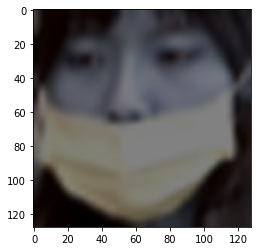

In [8]:
from matplotlib import pyplot
pyplot.imshow(x[0])

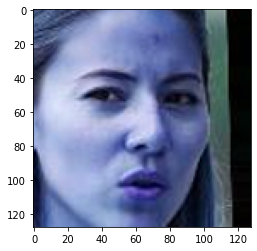

In [9]:
from matplotlib import pyplot
import cv2
import numpy as np
image =cv2.imread('../input/face-mask-detection/Dataset/without_mask/1007.png')


height,width=image.shape[:2]
pyplot.imshow(image)

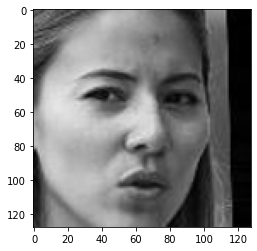

In [10]:
(row, col) = image.shape[0:2]
for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img[i, j] = sum(image[i, j]) * 0.33
        
pyplot.imshow(img)

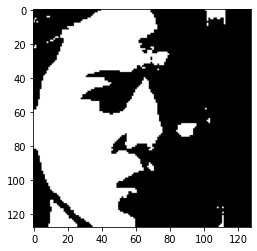

In [11]:
_,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
pyplot.imshow(thresh1)


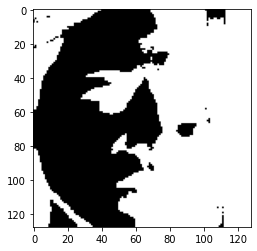

In [12]:
_,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
pyplot.imshow(thresh2)

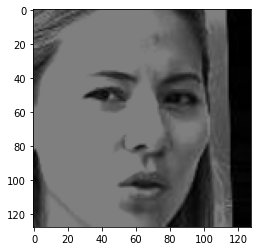

In [13]:
_,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
pyplot.imshow(thresh3)

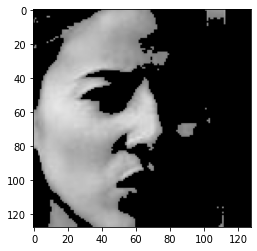

In [14]:
 _,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
pyplot.imshow(thresh4)

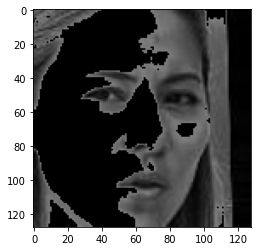

In [15]:
_,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
pyplot.imshow(thresh5)

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=1, shuffle=True)

In [18]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
x_val_scaled=x_val/255
print(len(x_train_scaled))
print(len(x_val_scaled))
print(len(x_test_scaled))

7185
899
898


In [19]:
#classifier="https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
#classifier="https://tfhub.dev/google/imagenet/inception_v2/feature_vector/5"
classifier="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
mod=hub.KerasLayer(classifier, input_shape=(224,224,3), trainable=False)

2021-11-18 15:55:57.137737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 15:55:57.255594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 15:55:57.256703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 15:55:57.258326: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [20]:
from tensorflow.python.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

In [21]:
import matplotlib.pyplot as plt
num_mask=3
model=tf.keras.Sequential([
    mod, 
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(num_mask)
])

model.compile(
    optimizer="adam", 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

history = model.fit(x_train_scaled, y_train, batch_size=20,epochs=10,callbacks = es, validation_data=(x_val_scaled, y_val))
    


2021-11-18 15:56:03.594484: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1412628480 exceeds 10% of free system memory.
2021-11-18 15:56:04.958657: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1412628480 exceeds 10% of free system memory.
2021-11-18 15:56:06.002608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-11-18 15:56:11.265741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


360/360 [==============================] - 21s 28ms/step - loss: 0.1475 - acc: 0.9543 - val_loss: 0.0897 - val_acc: 0.9611
Epoch 2/10
360/360 [==============================] - 8s 23ms/step - loss: 0.0250 - acc: 0.9916 - val_loss: 0.0436 - val_acc: 0.9889
Epoch 3/10
360/360 [==============================] - 8s 23ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 4/10
360/360 [==============================] - 8s 22ms/step - loss: 6.0362e-04 - acc: 1.0000 - val_loss: 0.0289 - val_acc: 0.9900
Epoch 5/10
360/360 [==============================] - 9s 25ms/step - loss: 2.7702e-04 - acc: 1.0000 - val_loss: 0.0311 - val_acc: 0.9911
Epoch 6/10
360/360 [==============================] - 9s 24ms/step - loss: 1.7028e-04 - acc: 1.0000 - val_loss: 0.0316 - val_acc: 0.9922
Epoch 7/10
360/360 [==============================] - 8s 23ms/step - loss: 1.2235e-04 - acc: 1.0000 - val_loss: 0.0303 - val_acc: 0.9911
Epoch 8/10
360/360 [==============================] - 8s 23ms/s

In [22]:
print("Testing accuracy: \n")
print(model.evaluate(x_test_scaled, y_test))

Testing accuracy: 

29/29 [==============================] - 1s 39ms/step - loss: 0.0573 - acc: 0.9866
[0.05725691840052605, 0.9866369962692261]


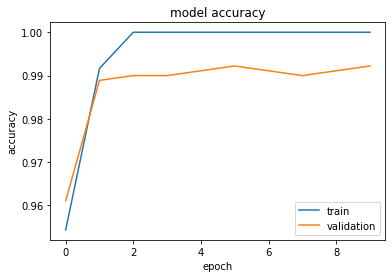

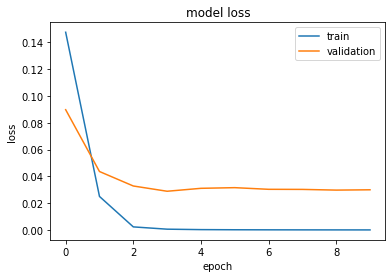

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
preds=model.predict(x_test_scaled)
pred_classes=np.argmax(preds, axis=1)
pred_classes

array([0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2,

In [25]:
class_labels=[0,1,2,3]
import sklearn.metrics as metrics
report = metrics.classification_report(y_test, pred_classes, class_labels)
print(report) 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_classes)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       294
           1       0.99      0.98      0.98       287
           2       0.99      0.98      0.99       317
           3       0.00      0.00      0.00         0

   micro avg       0.99      0.99      0.99       898
   macro avg       0.74      0.74      0.74       898
weighted avg       0.99      0.99      0.99       898



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[293,   1,   0],
       [  4, 281,   2],
       [  2,   3, 312]])